In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
df = pd.read_csv('data/train.csv')
df.shape

(381109, 12)

In [41]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [43]:
df.replace('?', np.nan, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [44]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [45]:
# drop the first column
df = df.iloc[:,1:]

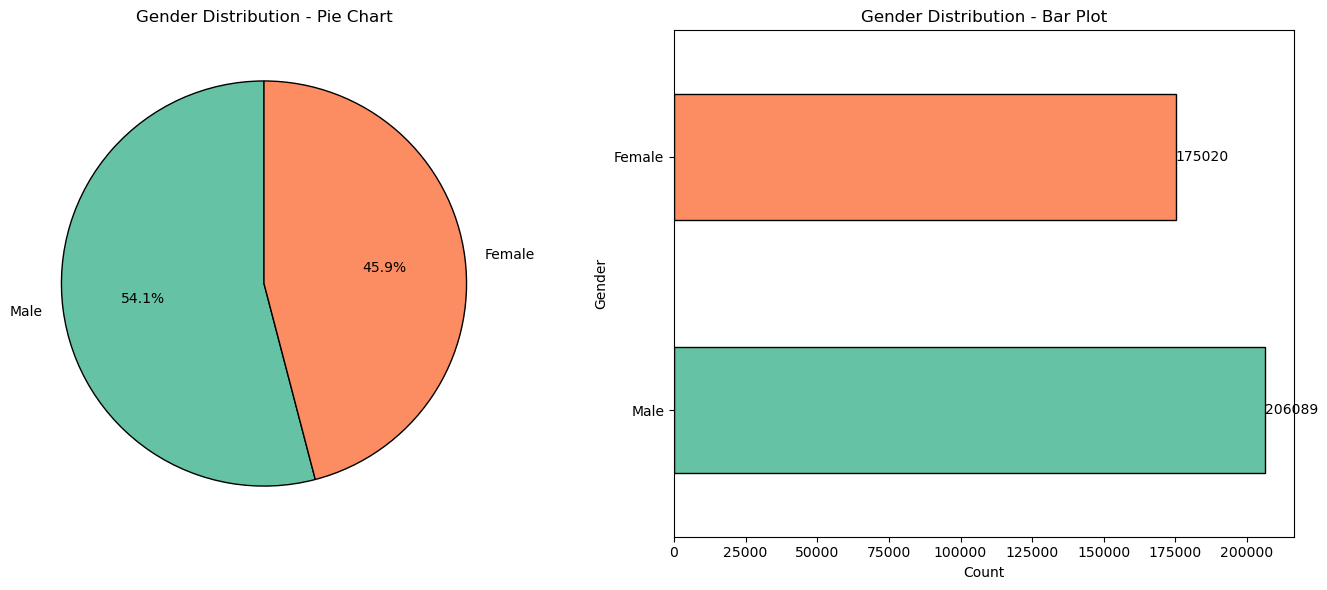

In [46]:
#Gender
counts = df['Gender'].value_counts().values

# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'Male': counts[0], 'Female': counts[1]}
df_gender = pd.Series(gender_counts)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Gender Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()

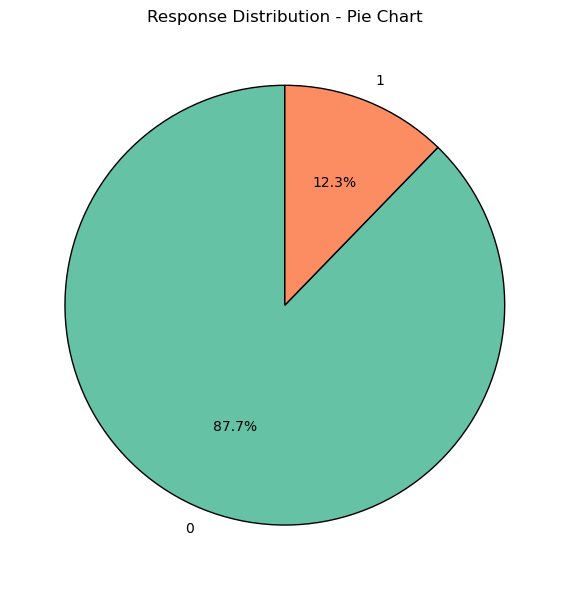

In [3]:
# Sample counts for 'Response' column (replace with actual values from df['Response'])
counts = df['Response'].value_counts().values

# Create a dictionary with counts for each response category
response_counts = {'0': counts[0], '1': counts[1]}
df_response = pd.Series(response_counts)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the pie chart
plt.pie(df_response, labels=df_response.index, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2"), startangle=90, 
        wedgeprops={"edgecolor": "black"})
plt.title('Response Distribution - Pie Chart')


# Adjust layout to ensure the caption doesn't overlap
plt.tight_layout()

# Save the plot with the desired settings
plt.savefig("response_new.png", dpi=500, bbox_inches='tight')

# Display the plot
plt.show()


In [52]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [53]:
correct_order = ['< 1 Year','1-2 Year','> 2 Years']
df['Vehicle_Age'].value_counts().reindex(correct_order)

Vehicle_Age
< 1 Year     164786
1-2 Year     200316
> 2 Years     16007
Name: count, dtype: int64

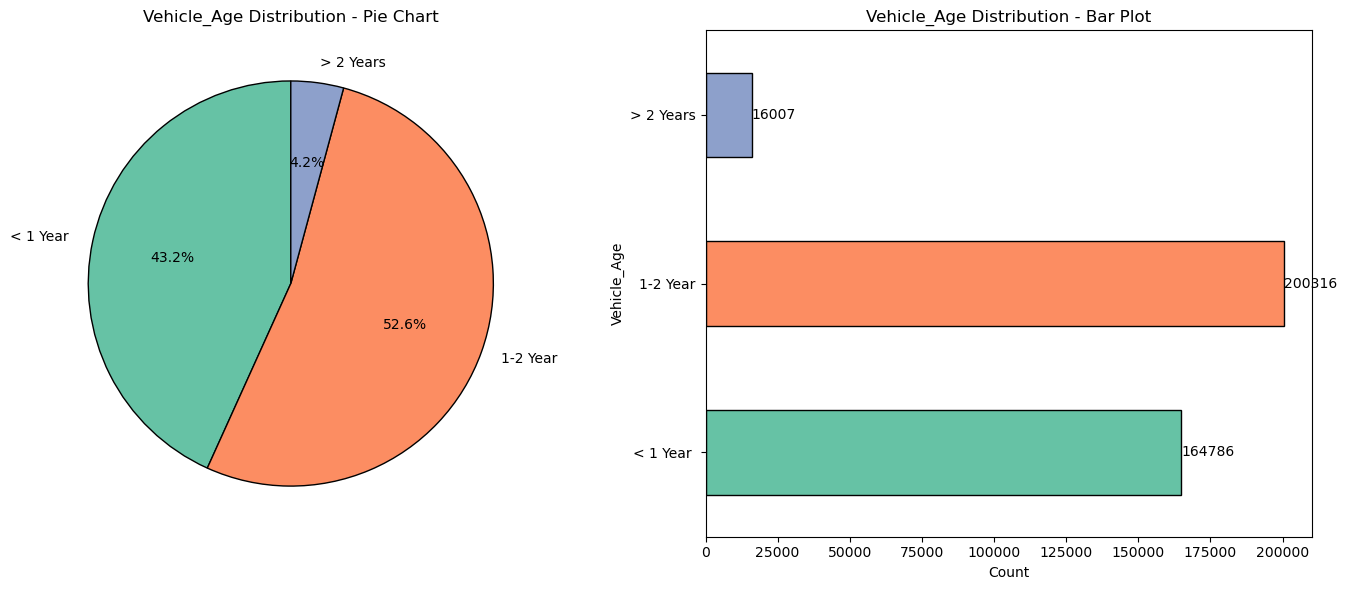

In [54]:
# Vehicle_Age
counts = df['Vehicle_Age'].value_counts().reindex(correct_order).values
# Set the figure size
# Sample data for 'Gender' column (replace with actual df['Gender'] for your use case)
gender_counts = {'< 1 Year ': counts[0], '1-2 Year': counts[1],'> 2 Years':counts[2]}
df_gender = pd.Series(gender_counts)
plt.figure(figsize=(14, 6))

# Create a 1x2 subplot for both the pie chart and bar plot
plt.subplot(1, 2, 1)
# Create the pie chart
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90, wedgeprops={"edgecolor":"black"})
plt.title('Vehicle_Age Distribution - Pie Chart')

# Create the horizontal bar plot on the second subplot
plt.subplot(1, 2, 2)
ax = df_gender.plot.barh(color=sns.color_palette("Set2"), edgecolor="black")
for index, value in enumerate(df_gender):
    ax.text(value + 10, index, str(value), va='center')

plt.xlabel('Count')
plt.ylabel('Vehicle_Age')
plt.title('Vehicle_Age Distribution - Bar Plot')

# Show the plot
plt.tight_layout()
plt.show()

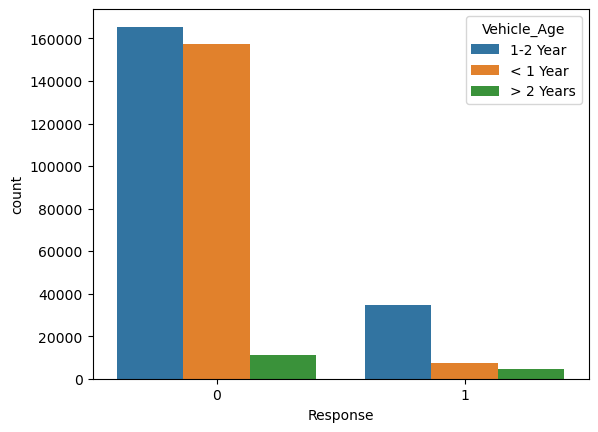

In [56]:
#Vehicle_Age
sns.countplot(x='Response', hue='Vehicle_Age', data=df)
plt.show()

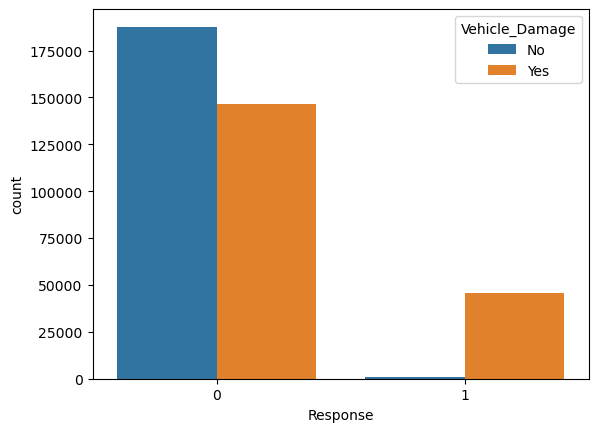

In [55]:


# Plot a count plot for two categorical variables
sns.countplot(x='Response', hue='Vehicle_Damage', data=df)

plt.show()


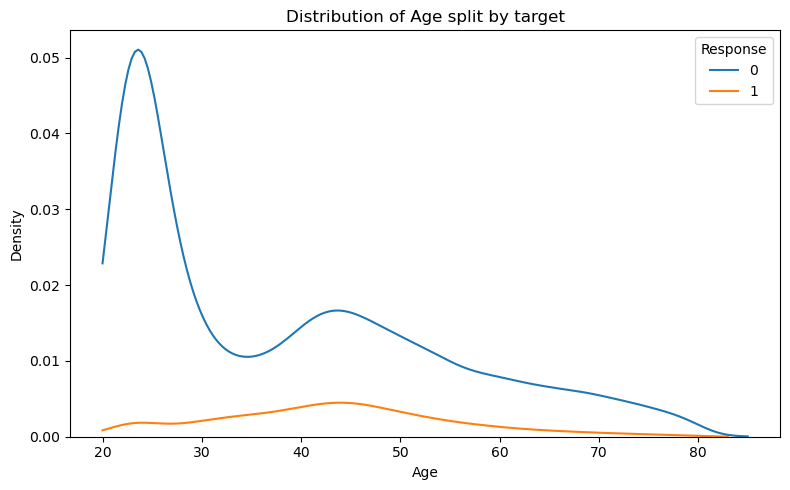

In [4]:
def plot_numerical(f, dataset=df, save_path=None):
    # Create the figure
    plt.figure(figsize=(8, 5))
    plt.title(f'Distribution of {f} split by target')
    
    # Plot the KDE distribution split by target
    sns.kdeplot(data=dataset, x=f, hue='Response', cut=0, bw_adjust=1.5)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    plt.savefig("age.png", dpi=500, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Call the function to plot 'Age'
plot_numerical('Age', dataset=df)



In [5]:
import pandas as pd

# Example: Select only numerical columns
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Compute Pearson correlation matrix
correlation_matrix = df[numerical_features + ['Response']].corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix['Response'].sort_values(ascending=False)

# Display correlations
print("Pearson Correlation with Target Variable (Response):")
print(target_correlations)



Pearson Correlation with Target Variable (Response):
Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Vintage                -0.001050
Policy_Sales_Channel   -0.139042
Name: Response, dtype: float64


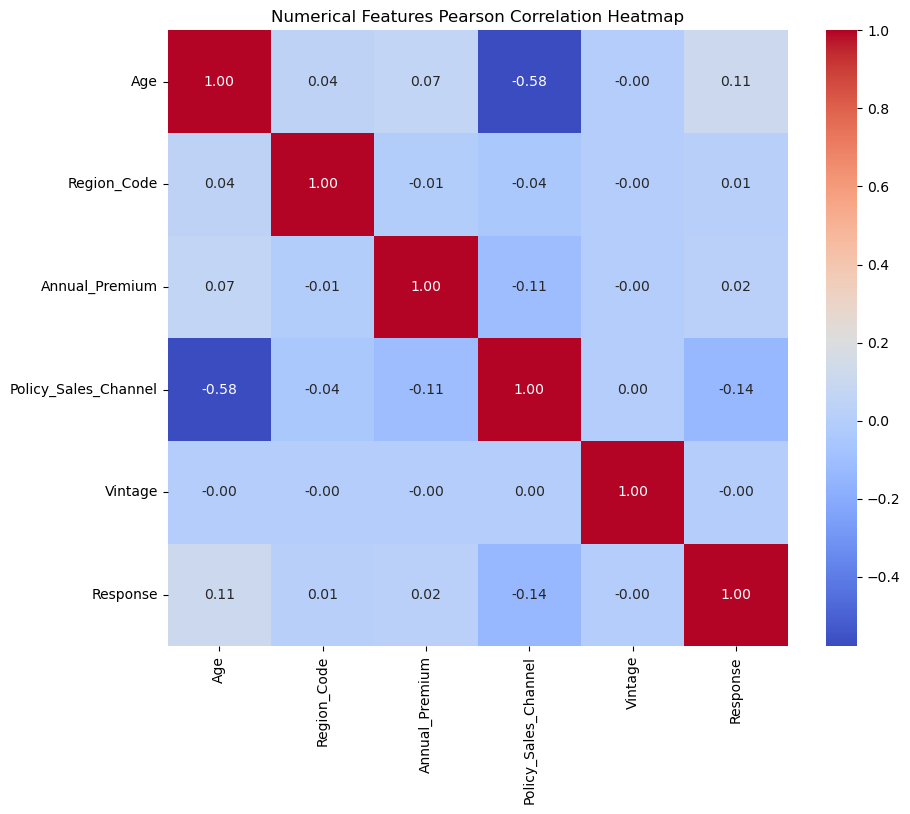

In [6]:


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numerical Features Pearson Correlation Heatmap")
plt.savefig("corr.png", dpi=500, bbox_inches='tight')
plt.show()


In [51]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183  
2            Yes         38294.0                  26.0       27  
3             No         28619.0                 152.0      203  
4             No         27496.0                 152.0       39

In [8]:
ordinal_ftrs = ['Vehicle_Age'] 
ordinal_cats = [['< 1 Year','1-2 Year','> 2 Years']]
onehot_ftrs = ['Gender','Vehicle_Damage']
minmax_ftrs = ['Age']
std_ftrs = ['Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
remainder='passthrough' )

prep = Pipeline(steps=[('preprocessor', preprocessor)])

In [9]:
#regular pipeline
def MLPipeLine(X, y, prep, ML_algo, param_grid):
    # rf
    nr_states = 5
    test_scores11 = np.zeros(nr_states)
    best_thresholds11 = np.zeros(nr_states)
    final_models11 = []
    precisions11 = np.zeros(nr_states)
    recalls11 = np.zeros(nr_states)
    
    class_labels = [0, 1]  # Adjust this based on the number of classes
    class_precisions = {label: [] for label in class_labels}
    class_recalls = {label: [] for label in class_labels}
    class_f1_scores = {label: [] for label in class_labels}
      # Assuming `prep` is already defined
    
    for i in range(nr_states):
        print(f"Random State {i+1}")
        
        # Split data into training and test sets
        X_other, X_test, y_other, y_test = train_test_split(X,y,\
                        train_size = 0.8,stratify=y,random_state = 42*i)
        
    

        X_other_prep = prep.fit_transform(X_other)
        
        # Define the pipeline with preprocessing and the model
        clf = Pipeline(steps=[
            ('ML_algo', ML_algo)
        ])
    
        kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
        #StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        grid_search = GridSearchCV(clf, param_grid, cv=kfold, scoring='f1',verbose=0, n_jobs=-1)
        grid_search.fit(X_other_prep, y_other)
            #print("Best parameters: ", grid_search.best_params_)
        
        # Get the best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")
        
        # Evaluate on validation and test sets
        X_test_prep = prep.transform(X_test)  # Transform the test data
        y_test_probs = best_model.predict_proba(X_test_prep)[:, 1]
        
        # Precision-Recall Curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)
        # Plot Precision-Recall vs Threshold
        plt.figure()
        plt.plot(thresholds, precision[:-1], label="Precision")
        plt.plot(thresholds, recall[:-1], label="Recall")
        plt.xlabel("Threshold")
        plt.ylabel("Score")
        plt.title(f"Precision-Recall vs Threshold (Random State {i+1})")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Compute F1-scores for each threshold
        f1_scores = [f1_score(y_test, (y_test_probs >= t).astype(int)) for t in thresholds]
        best_threshold = thresholds[np.argmax(f1_scores)]
        print(f"Best Threshold for F1-Score: {best_threshold:.2f}")
        
        # Evaluate using the best threshold
        y_test_pred_adjusted = (y_test_probs >= best_threshold).astype(int)
        precision_test = precision_score(y_test, y_test_pred_adjusted)
        recall_test = recall_score(y_test, y_test_pred_adjusted)
        f1_test = f1_score(y_test, y_test_pred_adjusted)
        precision, recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred_adjusted)
        precisions11[i]=precision_test
        recalls11[i] = recall_test
        print(f"Test Metrics with Adjusted Threshold - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-Score: {f1_test:.4f}")



# Assuming y_test contains true labels and y_pred contains predicted labels
        #class_metrics = classification_report(y_test, y_test_pred_adjusted, target_names=["Class 0", "Class 1"])  # Add class names
        class_metrics = classification_report(y_test, y_test_pred_adjusted, output_dict=True)
        for class_label in class_labels:  # Iterate through each class
            class_precisions[class_label].append(class_metrics[str(class_label)]["precision"])
            class_recalls[class_label].append(class_metrics[str(class_label)]["recall"])
            class_f1_scores[class_label].append(class_metrics[str(class_label)]["f1-score"])


        # Display the confusion matrix
        cm = confusion_matrix(y_test, y_test_pred_adjusted)
        # Normalize the confusion matrix to show fractions
        cm_normalized = cm.astype('float') / cm.sum()  # Normalize by total samples

        # Display the normalized confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=["Class 0", "Class 1"])
        disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Use '.2f' to format fractions to 2 decimal places
        plt.title("Confusion Matrix (Fractions)")
        plt.show()
    
        
        
        # Save the best model
        final_models11.append(best_model)
        test_scores11[i] = f1_test
        best_thresholds11[i] = best_threshold

    results_df = pd.DataFrame({
        "Model Index": range(nr_states),
        "F1 Score (Test)": test_scores11,
        "Precision (Test)": precisions11,
        "Recall (Test)": recalls11,
        "Best Threshold": best_thresholds11,
        "Best Model": final_models11
    })

    for class_label in class_precisions.keys():
        results_df[f"Class {class_label} Precision"] = class_precisions[class_label]
        results_df[f"Class {class_label} Recall"] = class_recalls[class_label]
        results_df[f"Class {class_label} F1-Score"] = class_f1_scores[class_label]

    return results_df

Random State 1
Best Parameters: {'ML_algo__max_depth': 5, 'ML_algo__max_features': 0.8}


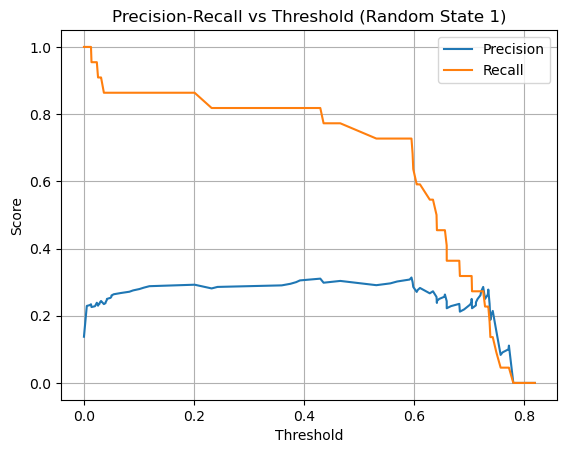

Best Threshold for F1-Score: 0.43
Test Metrics with Adjusted Threshold - Precision: 0.3103, Recall: 0.8182, F1-Score: 0.4500


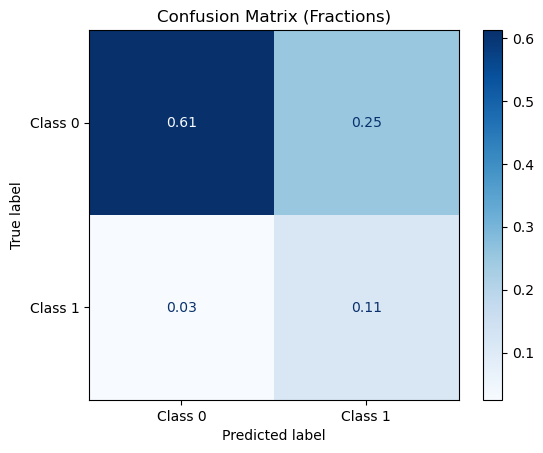

Random State 2
Best Parameters: {'ML_algo__max_depth': 5, 'ML_algo__max_features': 0.6}


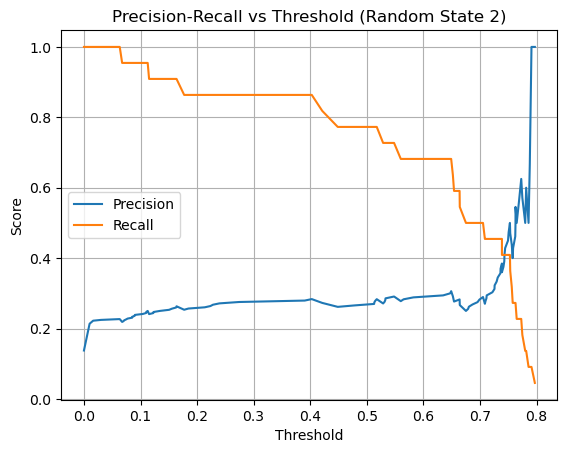

Best Threshold for F1-Score: 0.75
Test Metrics with Adjusted Threshold - Precision: 0.5000, Recall: 0.4091, F1-Score: 0.4500


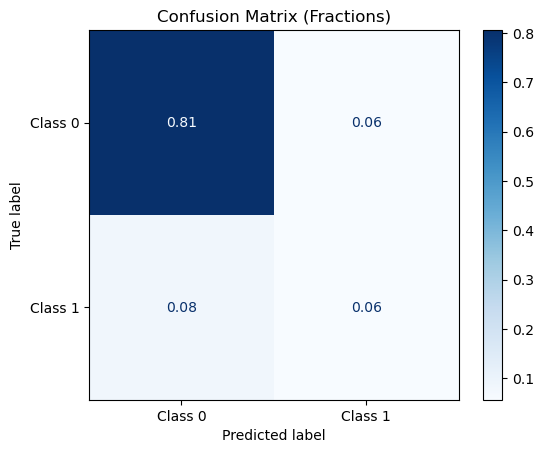

Random State 3
Best Parameters: {'ML_algo__max_depth': 7, 'ML_algo__max_features': 1.0}


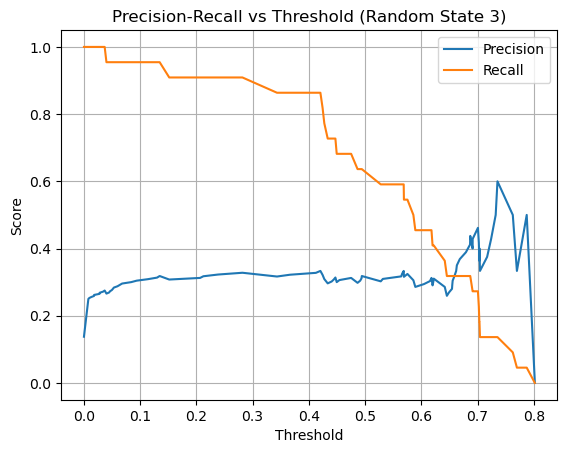

Best Threshold for F1-Score: 0.28
Test Metrics with Adjusted Threshold - Precision: 0.3279, Recall: 0.9091, F1-Score: 0.4819


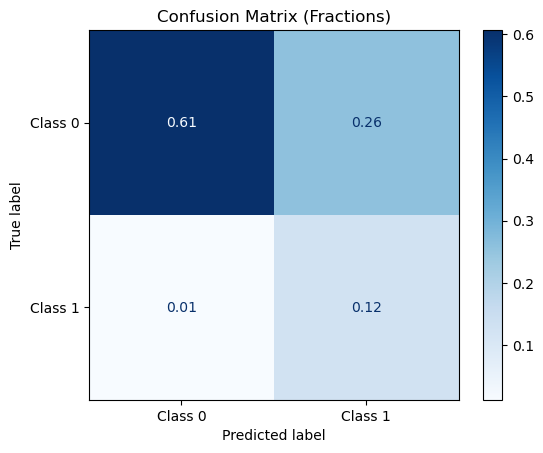

Random State 4
Best Parameters: {'ML_algo__max_depth': 5, 'ML_algo__max_features': 0.4}


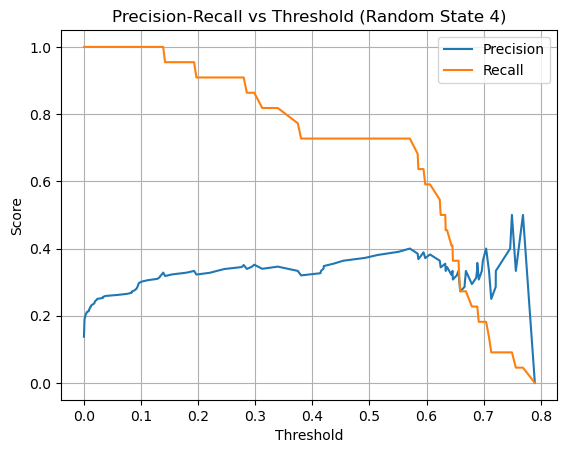

Best Threshold for F1-Score: 0.57
Test Metrics with Adjusted Threshold - Precision: 0.4000, Recall: 0.7273, F1-Score: 0.5161


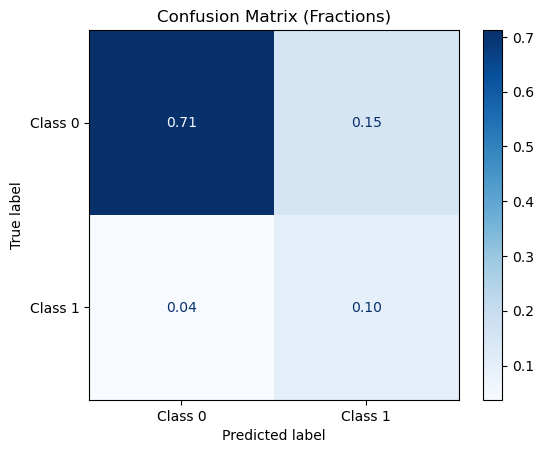

Random State 5
Best Parameters: {'ML_algo__max_depth': 5, 'ML_algo__max_features': 0.8}


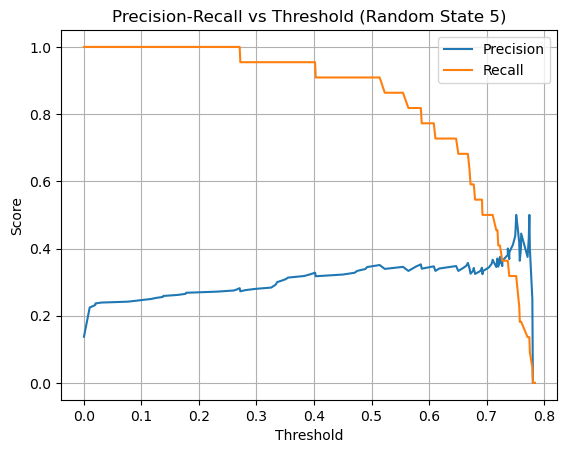

Best Threshold for F1-Score: 0.51
Test Metrics with Adjusted Threshold - Precision: 0.3509, Recall: 0.9091, F1-Score: 0.5063


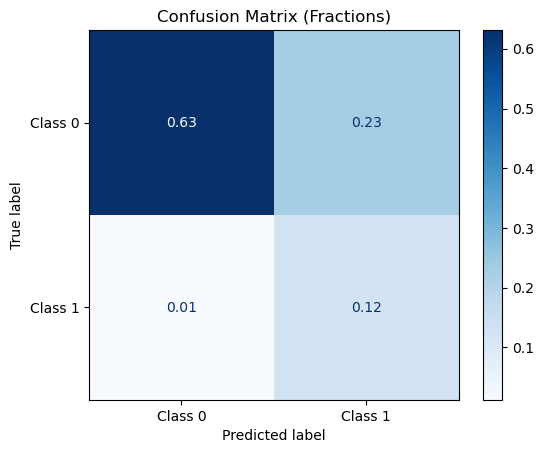

In [10]:
#rf
ML_algo = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
        'ML_algo__max_depth': [5,7,10,15,50],
        'ML_algo__max_features': [0.4,0.6,0.8,1.0]
    }

results11 = MLPipeLine(X, y, prep, ML_algo, param_grid)
#results12 = SmotePipeLine(X, y, prep, ML_algo, param_grid)

Random State 1
Best Parameters: {'ML_algo__C': 10, 'ML_algo__penalty': 'l1'}


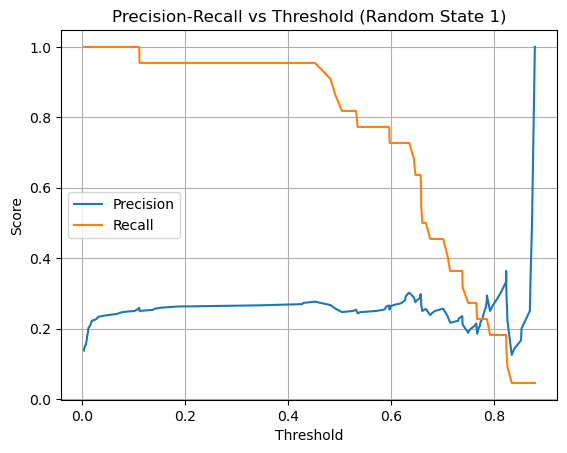

Best Threshold for F1-Score: 0.45
Test Metrics with Adjusted Threshold - Precision: 0.2763, Recall: 0.9545, F1-Score: 0.4286


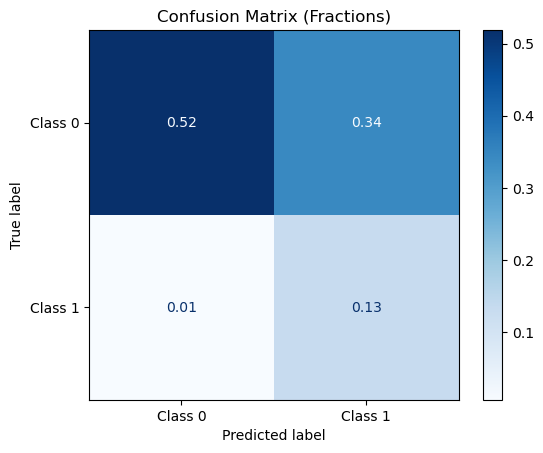

Random State 2
Best Parameters: {'ML_algo__C': 100, 'ML_algo__penalty': 'l1'}


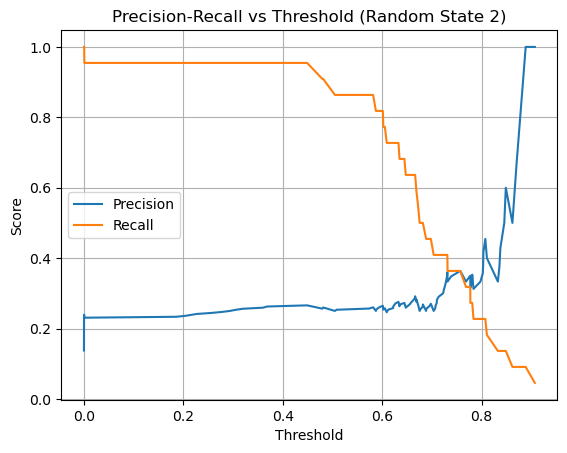

Best Threshold for F1-Score: 0.45
Test Metrics with Adjusted Threshold - Precision: 0.2658, Recall: 0.9545, F1-Score: 0.4158


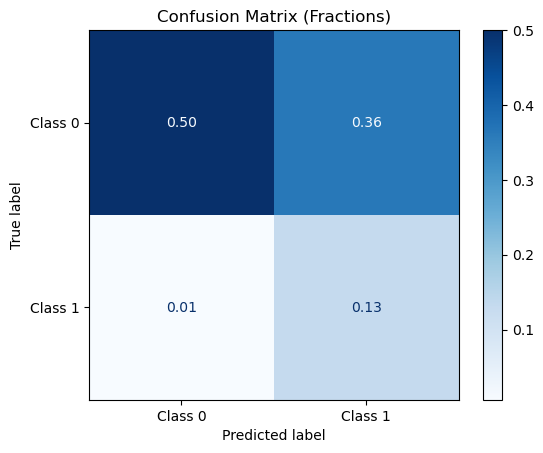

Random State 3
Best Parameters: {'ML_algo__C': 1, 'ML_algo__penalty': 'l1'}


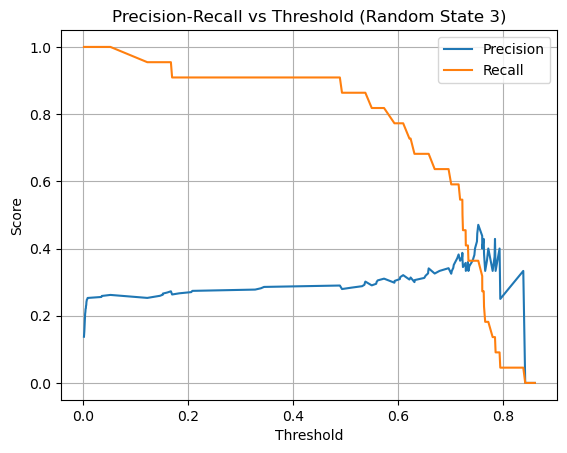

Best Threshold for F1-Score: 0.72
Test Metrics with Adjusted Threshold - Precision: 0.3824, Recall: 0.5909, F1-Score: 0.4643


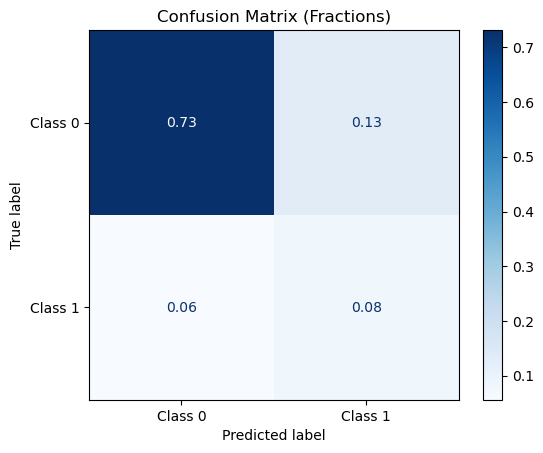

Random State 4
Best Parameters: {'ML_algo__C': 10, 'ML_algo__penalty': 'l1'}


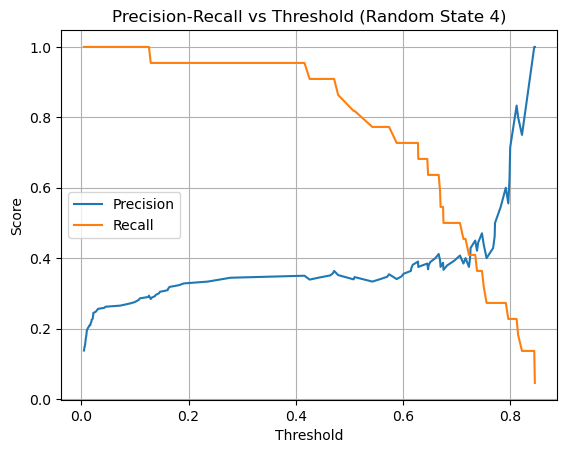

Best Threshold for F1-Score: 0.47
Test Metrics with Adjusted Threshold - Precision: 0.3636, Recall: 0.9091, F1-Score: 0.5195


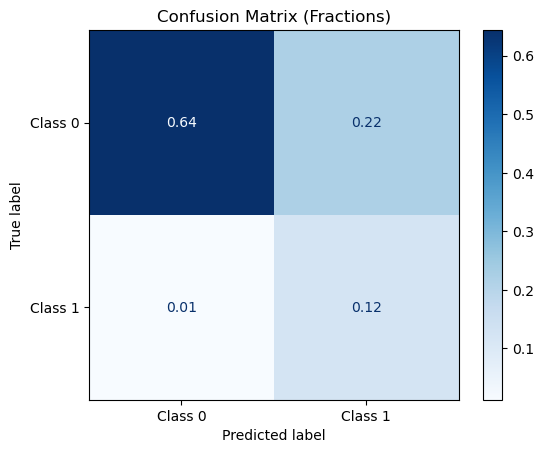

Random State 5
Best Parameters: {'ML_algo__C': 0.1, 'ML_algo__penalty': 'l1'}


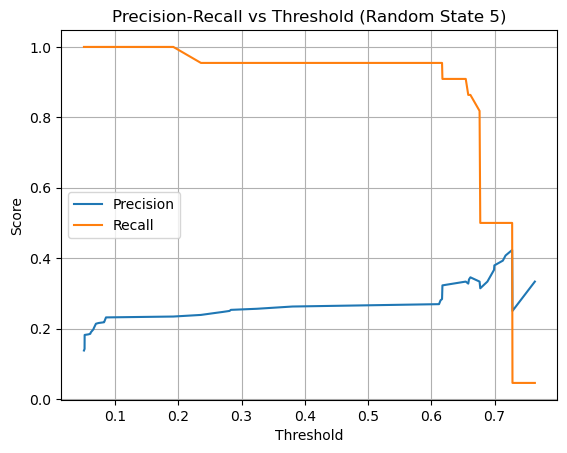

Best Threshold for F1-Score: 0.66
Test Metrics with Adjusted Threshold - Precision: 0.3455, Recall: 0.8636, F1-Score: 0.4935


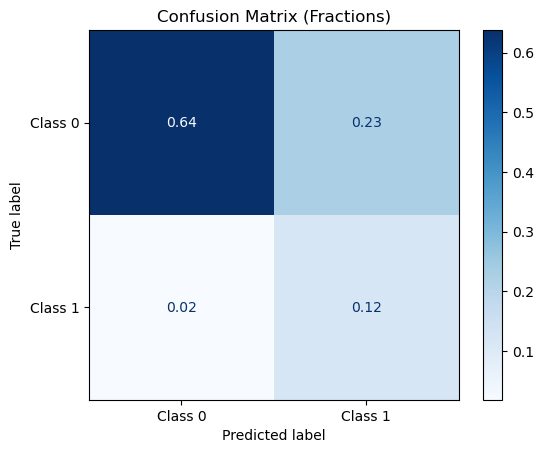

In [12]:
#logstic - lasso
#LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
ML_algo = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
param_grid = {
    'ML_algo__C': [ 0.1, 1, 10, 100,200],     # Regularization strength (inverse of regularization)
    'ML_algo__penalty': ['l1']  
} # Kernel coefficient #gamma 0.1,remove the two sides

results21 = MLPipeLine(X, y, prep, ML_algo, param_grid)
#results22 = SmotePipeLine(X, y, prep, ML_algo, param_grid)

Random State 1
Best Parameters: {'ML_algo__C': 10, 'ML_algo__penalty': 'l2'}


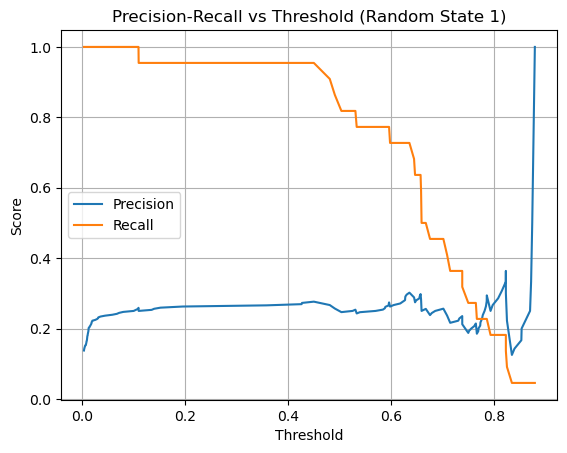

Best Threshold for F1-Score: 0.45
Test Metrics with Adjusted Threshold - Precision: 0.2763, Recall: 0.9545, F1-Score: 0.4286


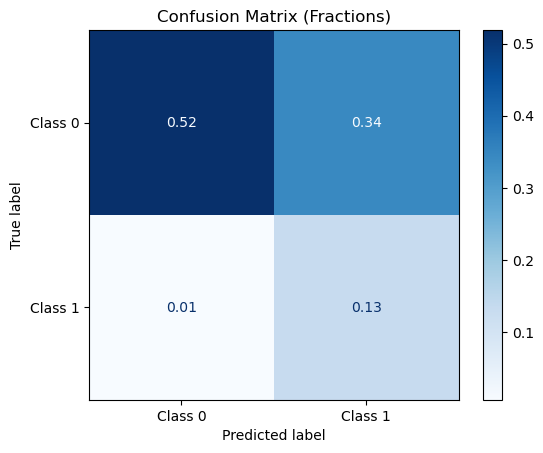

Random State 2
Best Parameters: {'ML_algo__C': 0.1, 'ML_algo__penalty': 'l2'}


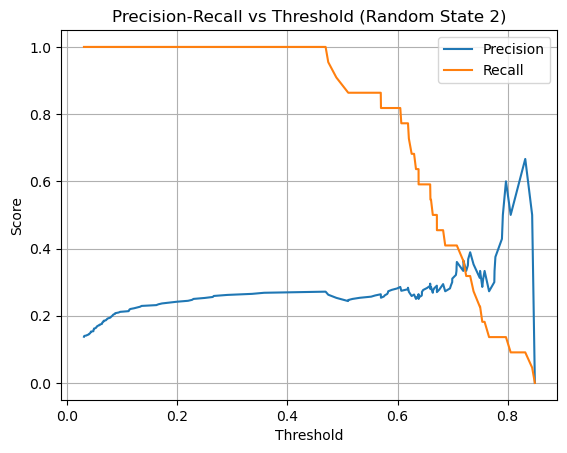

Best Threshold for F1-Score: 0.47
Test Metrics with Adjusted Threshold - Precision: 0.2716, Recall: 1.0000, F1-Score: 0.4272


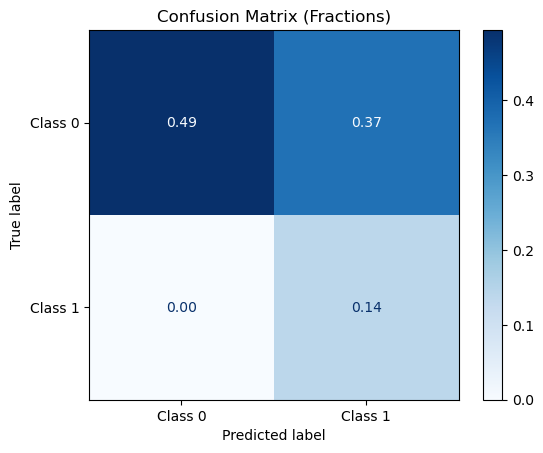

Random State 3
Best Parameters: {'ML_algo__C': 1, 'ML_algo__penalty': 'l2'}


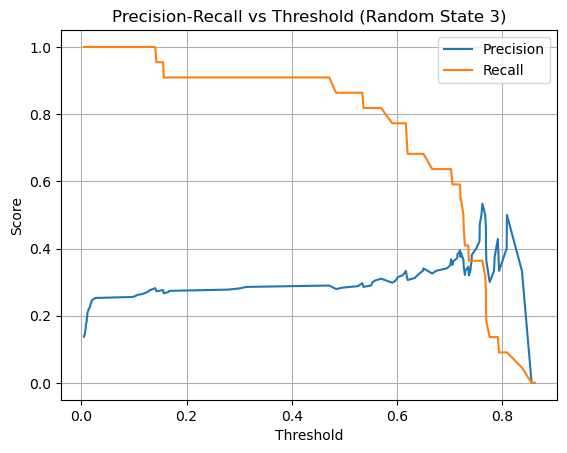

Best Threshold for F1-Score: 0.72
Test Metrics with Adjusted Threshold - Precision: 0.3939, Recall: 0.5909, F1-Score: 0.4727


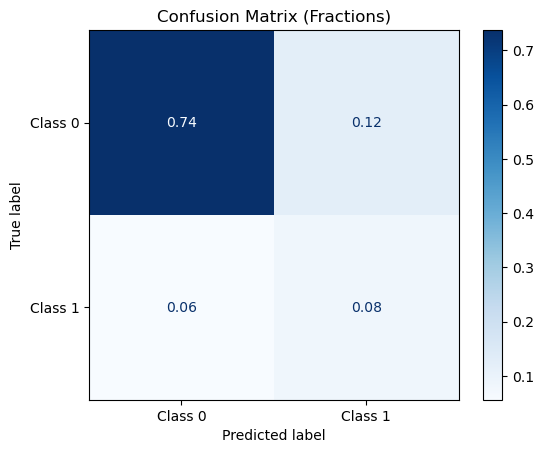

Random State 4
Best Parameters: {'ML_algo__C': 1, 'ML_algo__penalty': 'l2'}


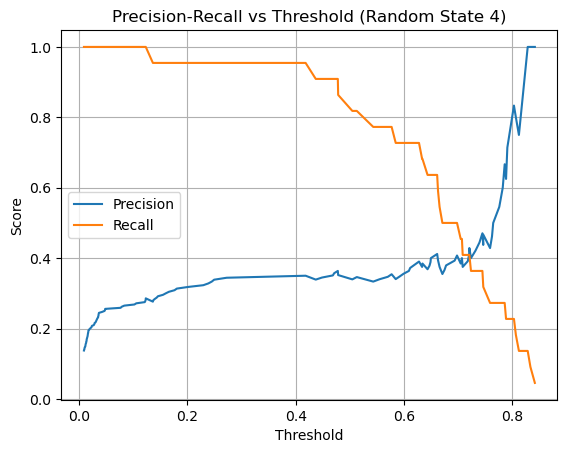

Best Threshold for F1-Score: 0.48
Test Metrics with Adjusted Threshold - Precision: 0.3636, Recall: 0.9091, F1-Score: 0.5195


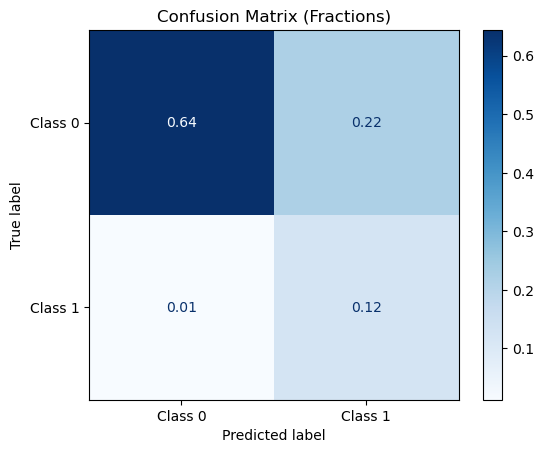

Random State 5
Best Parameters: {'ML_algo__C': 0.1, 'ML_algo__penalty': 'l2'}


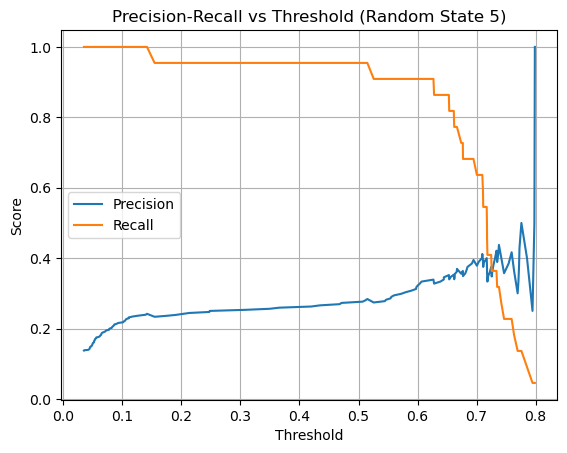

Best Threshold for F1-Score: 0.65
Test Metrics with Adjusted Threshold - Precision: 0.3519, Recall: 0.8636, F1-Score: 0.5000


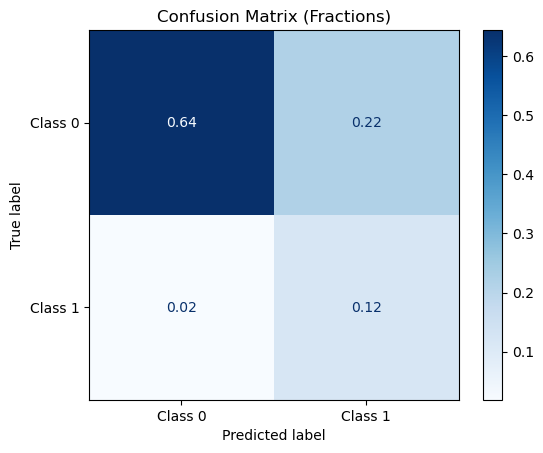

In [14]:
#logstic - ridge

ML_algo = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
param_grid = {
    'ML_algo__C': [ 0.1, 1, 10, 100,200],     # Regularization strength (inverse of regularization)
    'ML_algo__penalty': ['l2']  # L2 regularization (ridge)
} # Kernel coefficient #gamma 0.1,remove the two sides

results31 = MLPipeLine(X, y, prep, ML_algo, param_grid)
#results32 = SmotePipeLine(X, y, prep, ML_algo, param_grid)

Random State 1
Best Parameters: {'ML_algo__C': 100.0, 'ML_algo__gamma': 0.01}


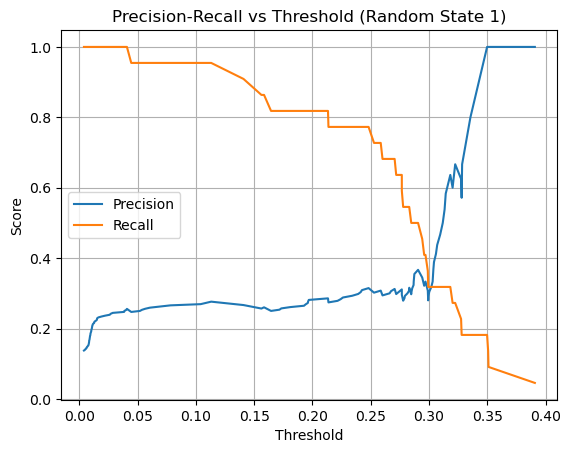

Best Threshold for F1-Score: 0.25
Test Metrics with Adjusted Threshold - Precision: 0.3148, Recall: 0.7727, F1-Score: 0.4474


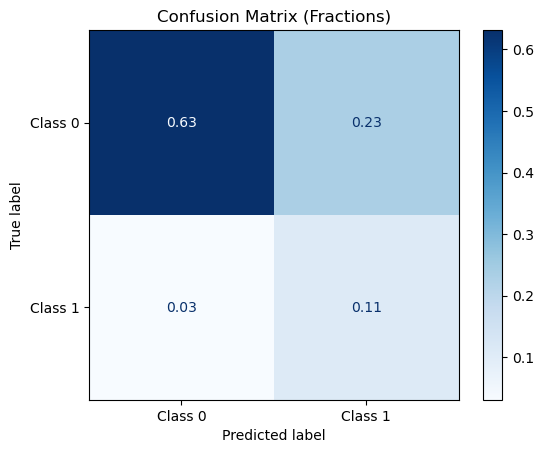

Random State 2
Best Parameters: {'ML_algo__C': 10.0, 'ML_algo__gamma': 0.01}


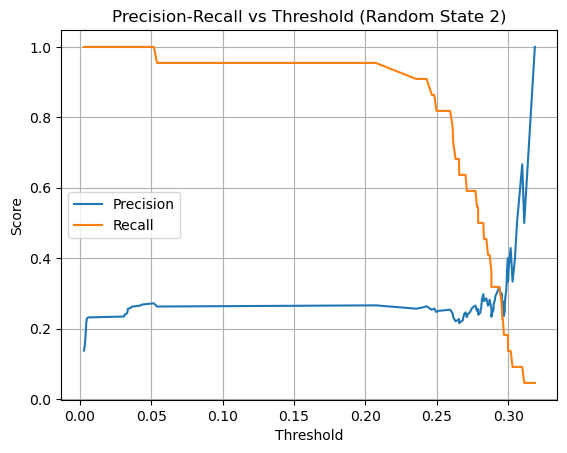

Best Threshold for F1-Score: 0.05
Test Metrics with Adjusted Threshold - Precision: 0.2716, Recall: 1.0000, F1-Score: 0.4272


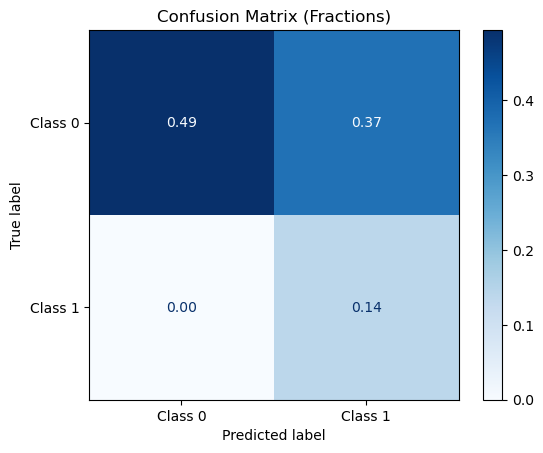

Random State 3
Best Parameters: {'ML_algo__C': 1.0, 'ML_algo__gamma': 0.1}


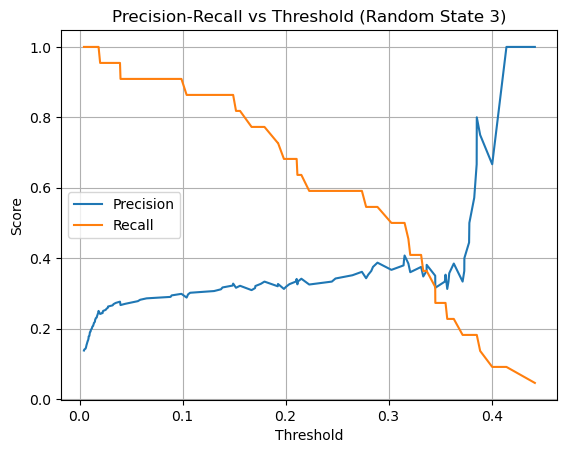

Best Threshold for F1-Score: 0.15
Test Metrics with Adjusted Threshold - Precision: 0.3276, Recall: 0.8636, F1-Score: 0.4750


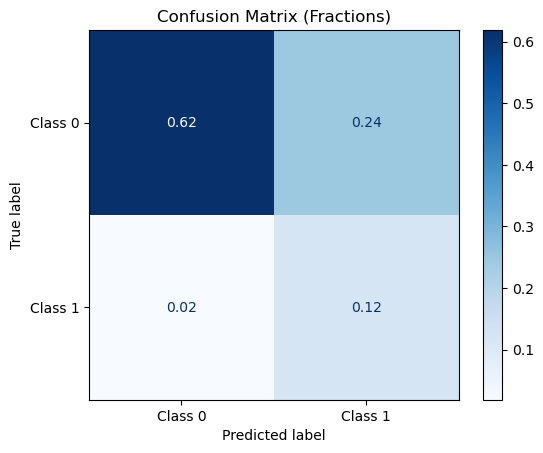

Random State 4
Best Parameters: {'ML_algo__C': 100.0, 'ML_algo__gamma': 0.01}


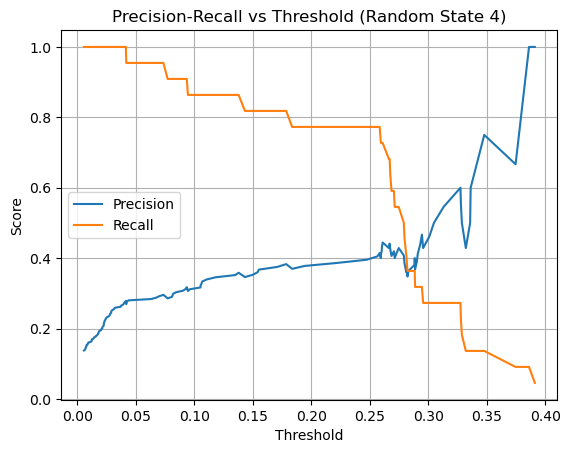

Best Threshold for F1-Score: 0.26
Test Metrics with Adjusted Threshold - Precision: 0.4444, Recall: 0.7273, F1-Score: 0.5517


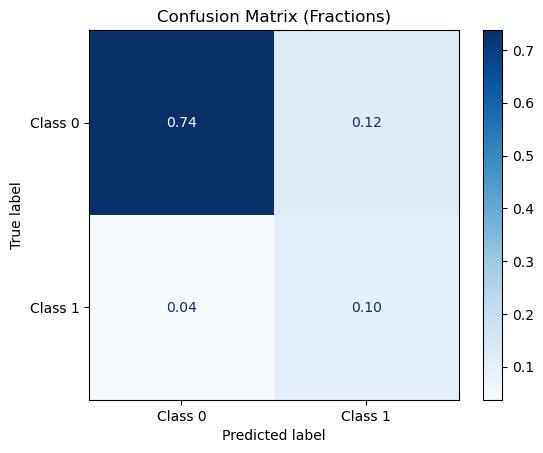

Random State 5
Best Parameters: {'ML_algo__C': 100.0, 'ML_algo__gamma': 0.01}


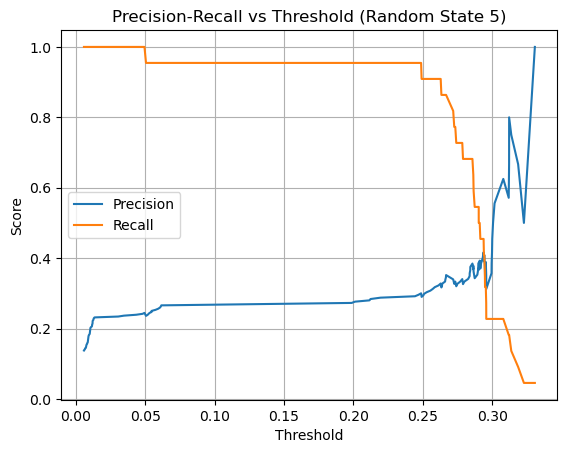

Best Threshold for F1-Score: 0.27
Test Metrics with Adjusted Threshold - Precision: 0.3519, Recall: 0.8636, F1-Score: 0.5000


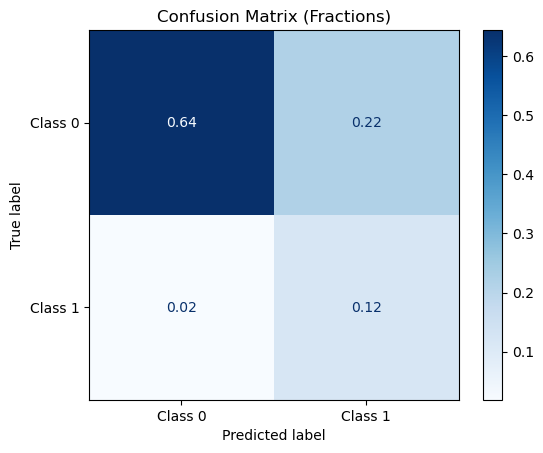

In [15]:
# svm
ML_algo = SVC(class_weight='balanced', probability=True, random_state=42)

param_grid = {
    'ML_algo__C': [ 1e-1, 1e0, 1e1, 1e2,1e3],          # Regularization parameter
    'ML_algo__gamma': [ 1e-2, 1e-1, 1e0, 1e1] # Kernel coefficient #gamma 0.1,remove the two sides
}


results41 = MLPipeLine(X, y, prep, ML_algo, param_grid)
#results42 = SmotePipeLine(X, y, prep, ML_algo, param_grid)

Random State 1
Best Parameters: {'ML_algo__learning_rate': 0.1, 'ML_algo__max_depth': 1, 'ML_algo__n_estimators': 50}


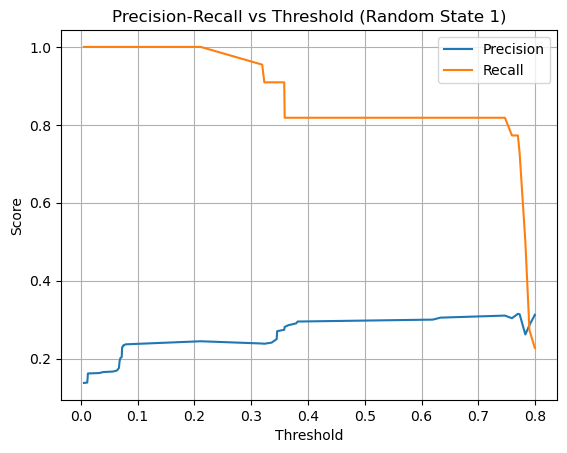

Best Threshold for F1-Score: 0.75
Test Metrics with Adjusted Threshold - Precision: 0.3103, Recall: 0.8182, F1-Score: 0.4500


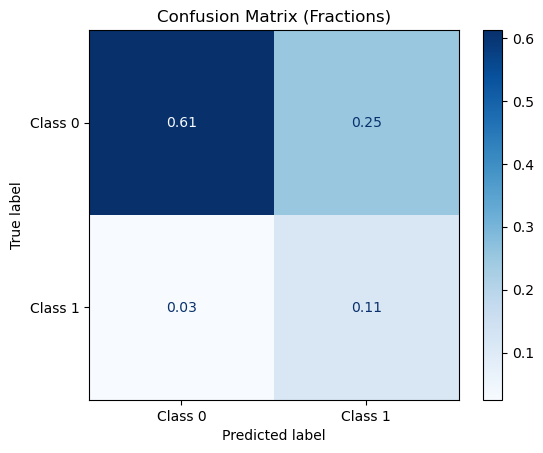

Random State 2
Best Parameters: {'ML_algo__learning_rate': 0.01, 'ML_algo__max_depth': 5, 'ML_algo__n_estimators': 150}


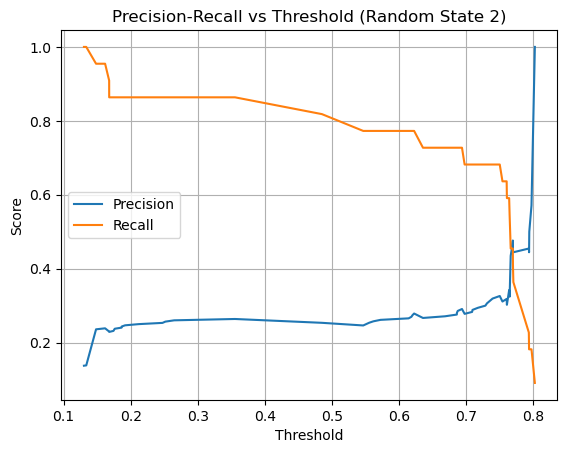

Best Threshold for F1-Score: 0.77
Test Metrics with Adjusted Threshold - Precision: 0.4762, Recall: 0.4545, F1-Score: 0.4651


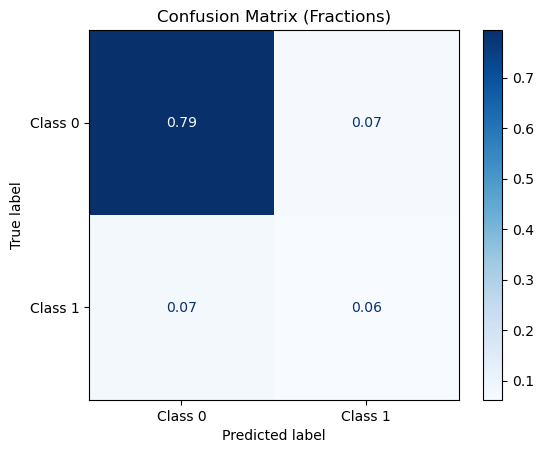

Random State 3
Best Parameters: {'ML_algo__learning_rate': 0.01, 'ML_algo__max_depth': 5, 'ML_algo__n_estimators': 50}


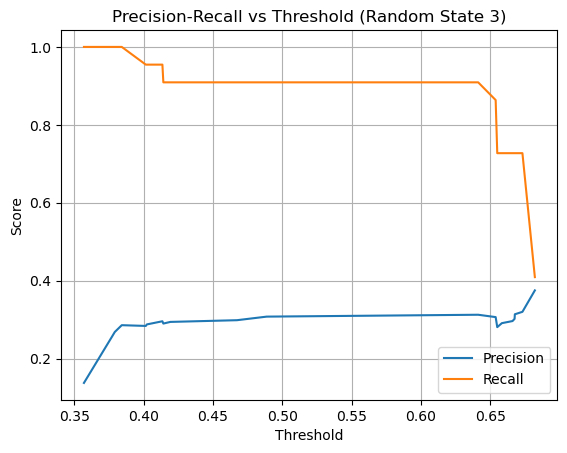

Best Threshold for F1-Score: 0.64
Test Metrics with Adjusted Threshold - Precision: 0.3125, Recall: 0.9091, F1-Score: 0.4651


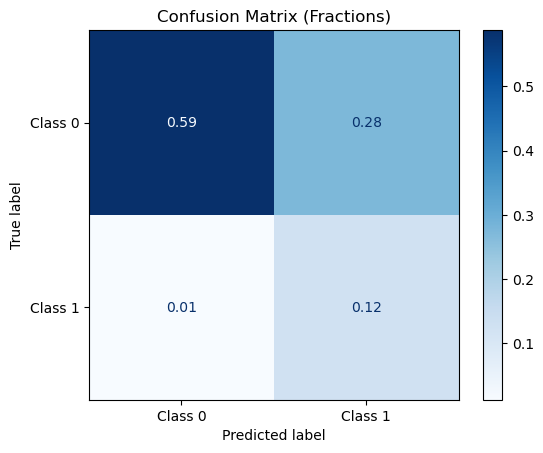

Random State 4
Best Parameters: {'ML_algo__learning_rate': 0.1, 'ML_algo__max_depth': 1, 'ML_algo__n_estimators': 75}


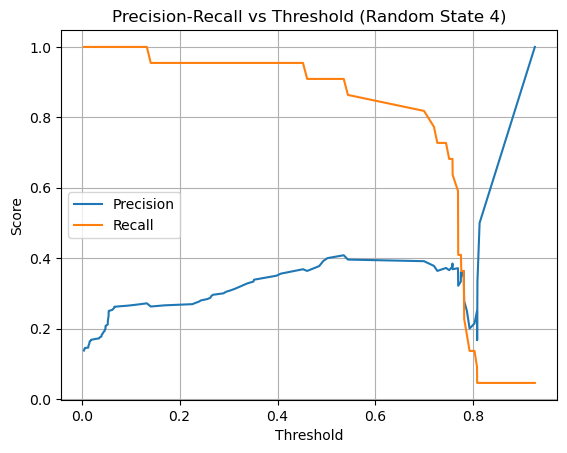

Best Threshold for F1-Score: 0.54
Test Metrics with Adjusted Threshold - Precision: 0.4082, Recall: 0.9091, F1-Score: 0.5634


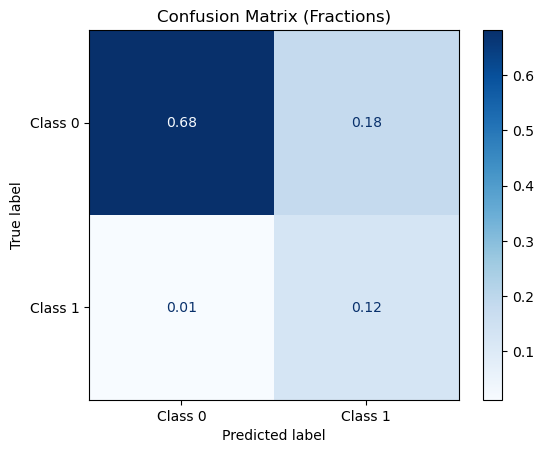

Random State 5
Best Parameters: {'ML_algo__learning_rate': 0.1, 'ML_algo__max_depth': 1, 'ML_algo__n_estimators': 75}


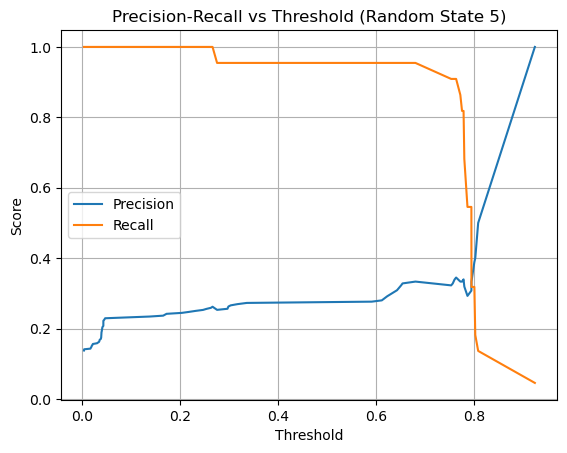

Best Threshold for F1-Score: 0.76
Test Metrics with Adjusted Threshold - Precision: 0.3448, Recall: 0.9091, F1-Score: 0.5000


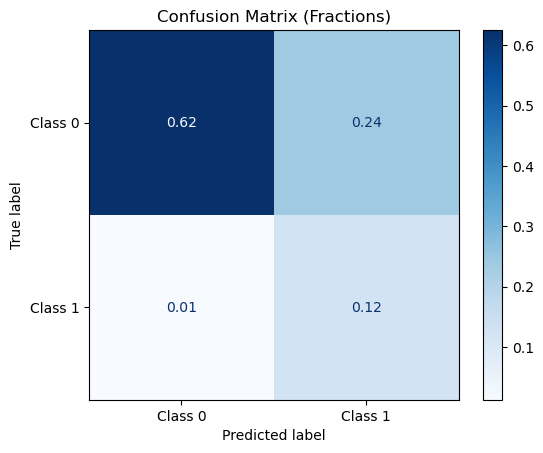

In [16]:
# xgbosst
ML_algo = XGBClassifier(objective='binary:logistic', scale_pos_weight=9, random_state=42)


param_grid = {
    'ML_algo__max_depth': [1,3,5, 10],
    'ML_algo__learning_rate': [0.01, 0.1, 0.2],
    'ML_algo__n_estimators': [50, 75, 100, 150, 200]
}

results51 = MLPipeLine(X, y, prep, ML_algo, param_grid)

        Algorithm   F1 Mean  F1 Std Dev
0   Random Forest  0.480877    0.030816
1  Logistic-Lasso  0.464337    0.043367
2  Logistic-Ridge  0.469593    0.041546
3             SVM  0.480255    0.048537
4         XGBoost  0.488723    0.045593


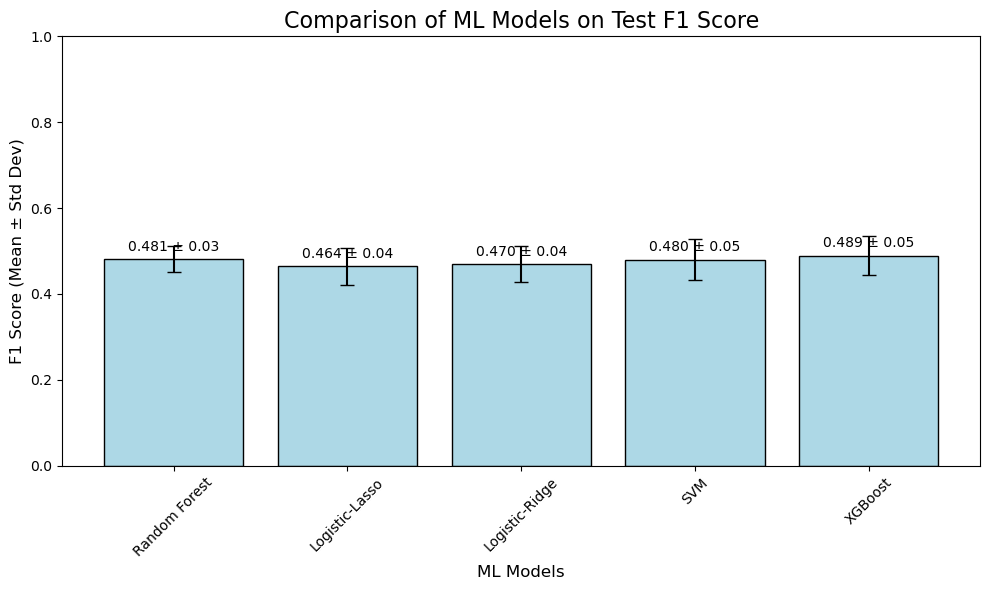

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all tables into a dictionary
results = {
    "Random Forest": results11,
    "Logistic-Lasso": results21,
    "Logistic-Ridge": results31,
    "SVM": results41,
    "XGBoost": results51,
}


# Create mean_metrics DataFrame dynamically
mean_metrics = pd.DataFrame([
    {
        "Algorithm": algo,
        "F1 Mean": df["F1 Score (Test)"].mean(),
        "F1 Std Dev": df["F1 Score (Test)"].std()
    }
    for algo, df in results.items()
])

# Print the combined metrics DataFrame
print(mean_metrics)

# Plot the data
algorithms = mean_metrics["Algorithm"]
mean_f1_scores = mean_metrics["F1 Mean"]
std_devs = mean_metrics["F1 Std Dev"]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, mean_f1_scores, yerr=std_devs, capsize=5, color="lightblue", edgecolor="black")

# Annotate bars with "mean ± std dev"
for bar, mean, std in zip(bars, mean_f1_scores, std_devs):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.02,  # Slightly above the bar
        f"{mean:.3f} ± {std:.2f}", 
        ha="center", 
        fontsize=10
    )

# Add title and labels
plt.title("Comparison of ML Models on Test F1 Score", fontsize=16)
plt.ylabel("F1 Score (Mean ± Std Dev)", fontsize=12)
plt.xlabel("ML Models", fontsize=12)
plt.ylim(0, 1)  # Adjust based on the F1 Score range
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.savefig("result.png", dpi=500, bbox_inches='tight')
plt.show()


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


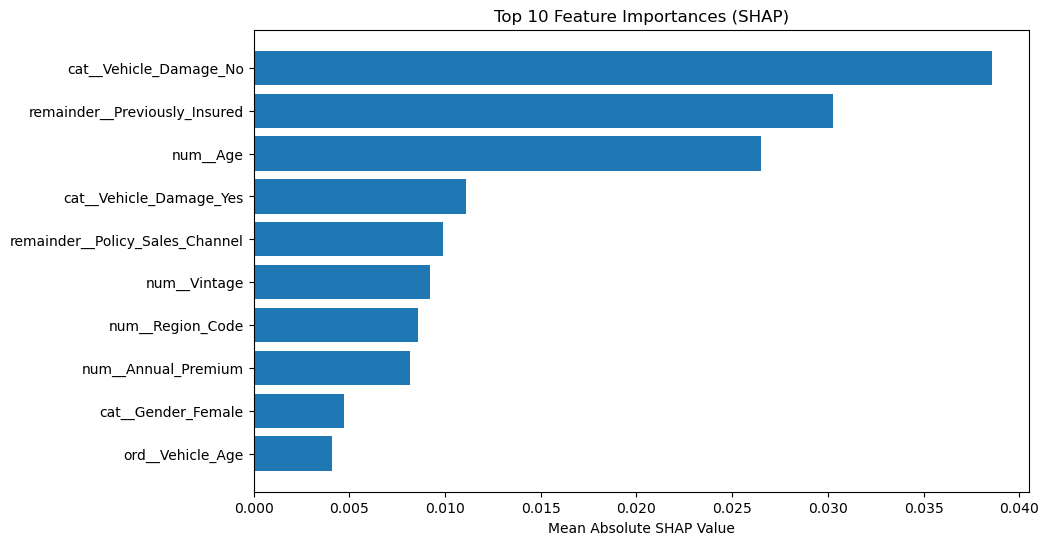

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap

explainer = shap.TreeExplainer(XGB)
shap_values = explainer(df_test)

mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
sorted_idx = np.argsort(mean_abs_shap_values)[-10:][::-1] 


top_features = np.array(feature_names)[sorted_idx]
top_shap_values = mean_abs_shap_values[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(top_features, top_shap_values, align="center")
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Feature Importances (SHAP)")
plt.gca().invert_yaxis()
plt.savefig("shap.png", dpi=500, bbox_inches='tight')
plt.show()

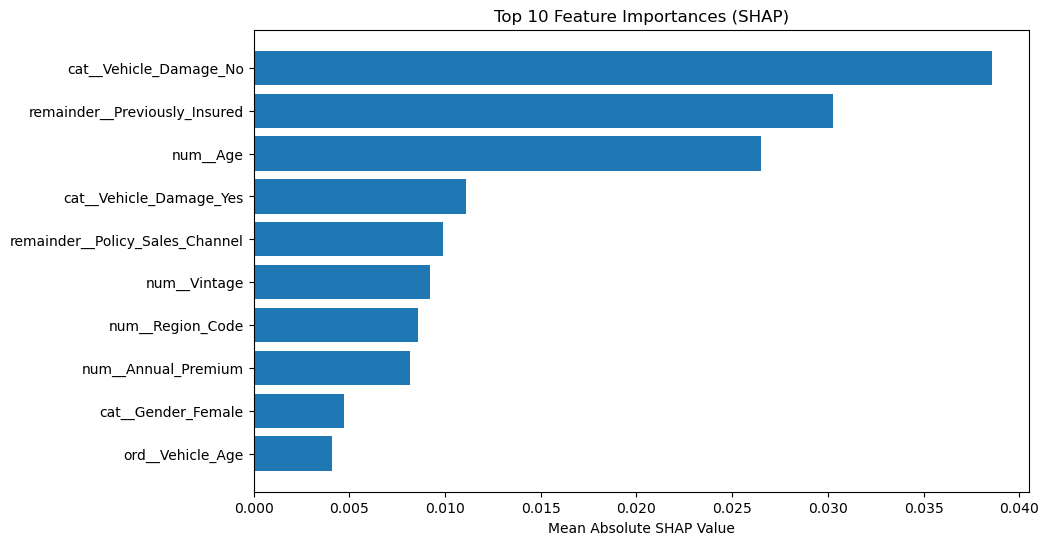

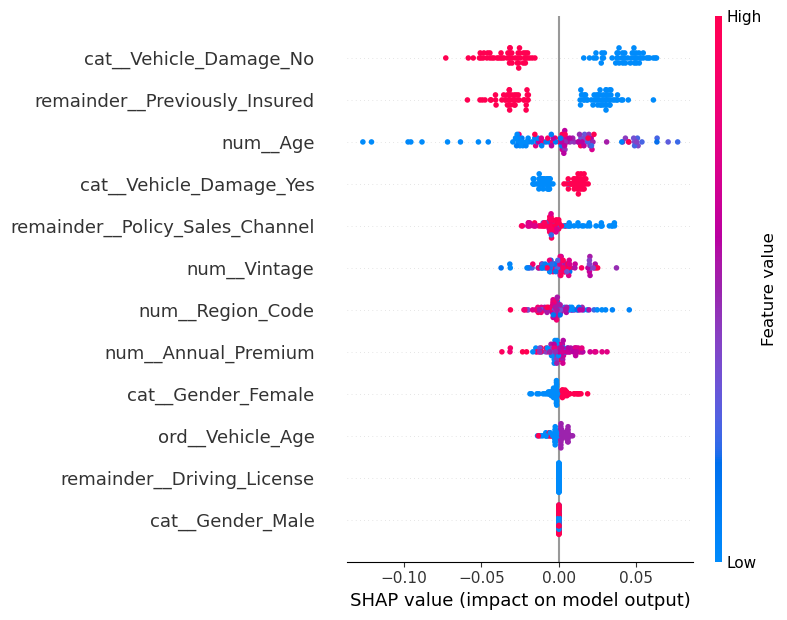

In [23]:
import shap

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(XGB)
shap_values = explainer(df_test)

mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
sorted_idx = np.argsort(mean_abs_shap_values)[-10:][::-1] 


top_features = np.array(feature_names)[sorted_idx]
top_shap_values = mean_abs_shap_values[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(top_features, top_shap_values, align="center")
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Feature Importances (SHAP)")
plt.gca().invert_yaxis()
plt.savefig("SHAP.png", dpi=500, bbox_inches='tight')
plt.show()

shap_values = explainer.shap_values(df_test[:100])
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')

shap.summary_plot(shap_values, df_test[:100],feature_names = feature_names)

In [26]:
import shap
import matplotlib.pyplot as plt

# Generate SHAP values
shap_values = explainer.shap_values(df_test[:100])

# Create the SHAP summary plot, and save it with the correct backend
plt.figure(figsize=(10, 6))  # Set the figure size
shap.summary_plot(shap_values, df_test[:100], feature_names=feature_names, show=False)  # Disable auto-show

# Save the plot
plt.savefig("shap_summary_plot3.png", dpi=300, bbox_inches='tight')

# Close the figure to avoid overlapping plots in subsequent visualizations
plt.close()


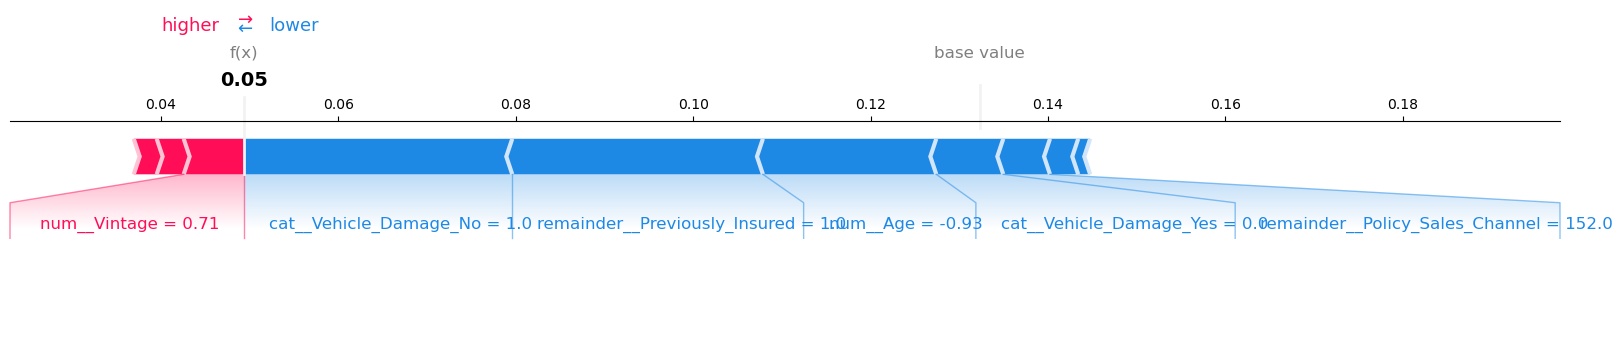

In [31]:


indices = [30]
df_test = pd.DataFrame(data=df_test, columns=feature_names)

for idx in indices:
    # Round feature values for better readability
    feature_values_rounded = df_test.iloc[idx].round(2)
    
    # Create SHAP force plot with matplotlib
    shap_plot = shap.force_plot(
        explainer.expected_value, 
        shap_values[idx, :],  # Removed `.values`
        feature_values_rounded, 
        feature_names=feature_names,
        matplotlib=True  # Enable Matplotlib rendering
    )
    
    # Save the plot
    plt.savefig(f"NEW_shap_force_plot_idx_{idx}.png", dpi=300, bbox_inches='tight')
    plt.close()  # Close the plot to avoid overlapping


In [35]:
import os

metrics = ["weight", "gain", "cover", "total_gain", "total_cover"]

# Map XGBoost's internal feature names (f0, f1, ...) to actual feature names
feature_map = {f"f{i}": name for i, name in enumerate(feature_names)}

# Extract feature importance and map feature names
feature_importance = {
    metric: {
        feature_map.get(k, k): v  # Replace XGBoost feature names with actual names
        for k, v in XGB.get_booster().get_score(importance_type=metric).items()
    }
    for metric in metrics
}

# Convert importance into DataFrames
importance_dfs = {
    metric: pd.DataFrame(list(importance.items()), columns=["Feature", metric])
    for metric, importance in feature_importance.items()
}

# Sort and select the top 10 features for each metric
sorted_importance_dfs = {
    metric: df.sort_values(by=metric, ascending=False).head(10)
    for metric, df in importance_dfs.items()
}

# Directory to save plots
output_dir = "feature_importance_plots"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Plot and save top 10 features by each metric
for metric, df in sorted_importance_dfs.items():
    plt.figure(figsize=(8, 6))
    plt.barh(df["Feature"][::-1], df[metric][::-1])  # Reverse for descending order
    plt.xlabel(f"Importance ({metric})")
    plt.ylabel("Feature")
    plt.title(f"Top 10 Features by {metric.capitalize()}")
    plt.tight_layout()
    
    # Save the plot with a descriptive filename
    save_path = os.path.join(output_dir, f"top_10_features_{metric}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()  # Close the figure to avoid overlapping plots
